In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### 1.Data Preparation

In [4]:
df = pd.read_csv("heart_disease.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


### 2.Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.shape

(908, 13)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

<Axes: >

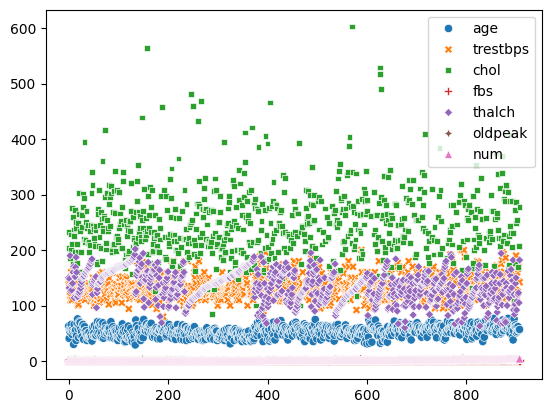

In [9]:
import seaborn as sns
sns.scatterplot(data=df)

<Axes: >

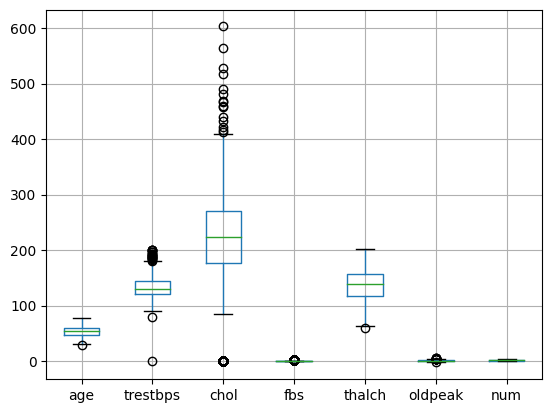

In [10]:
df.boxplot()

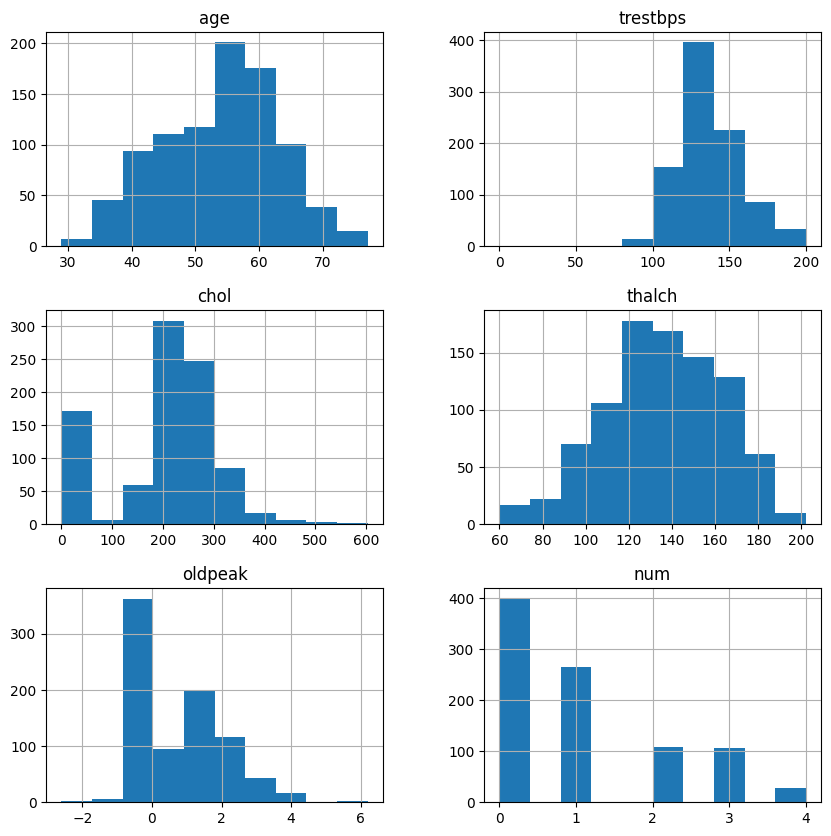

In [11]:
hist = df.hist(figsize=(10,10))

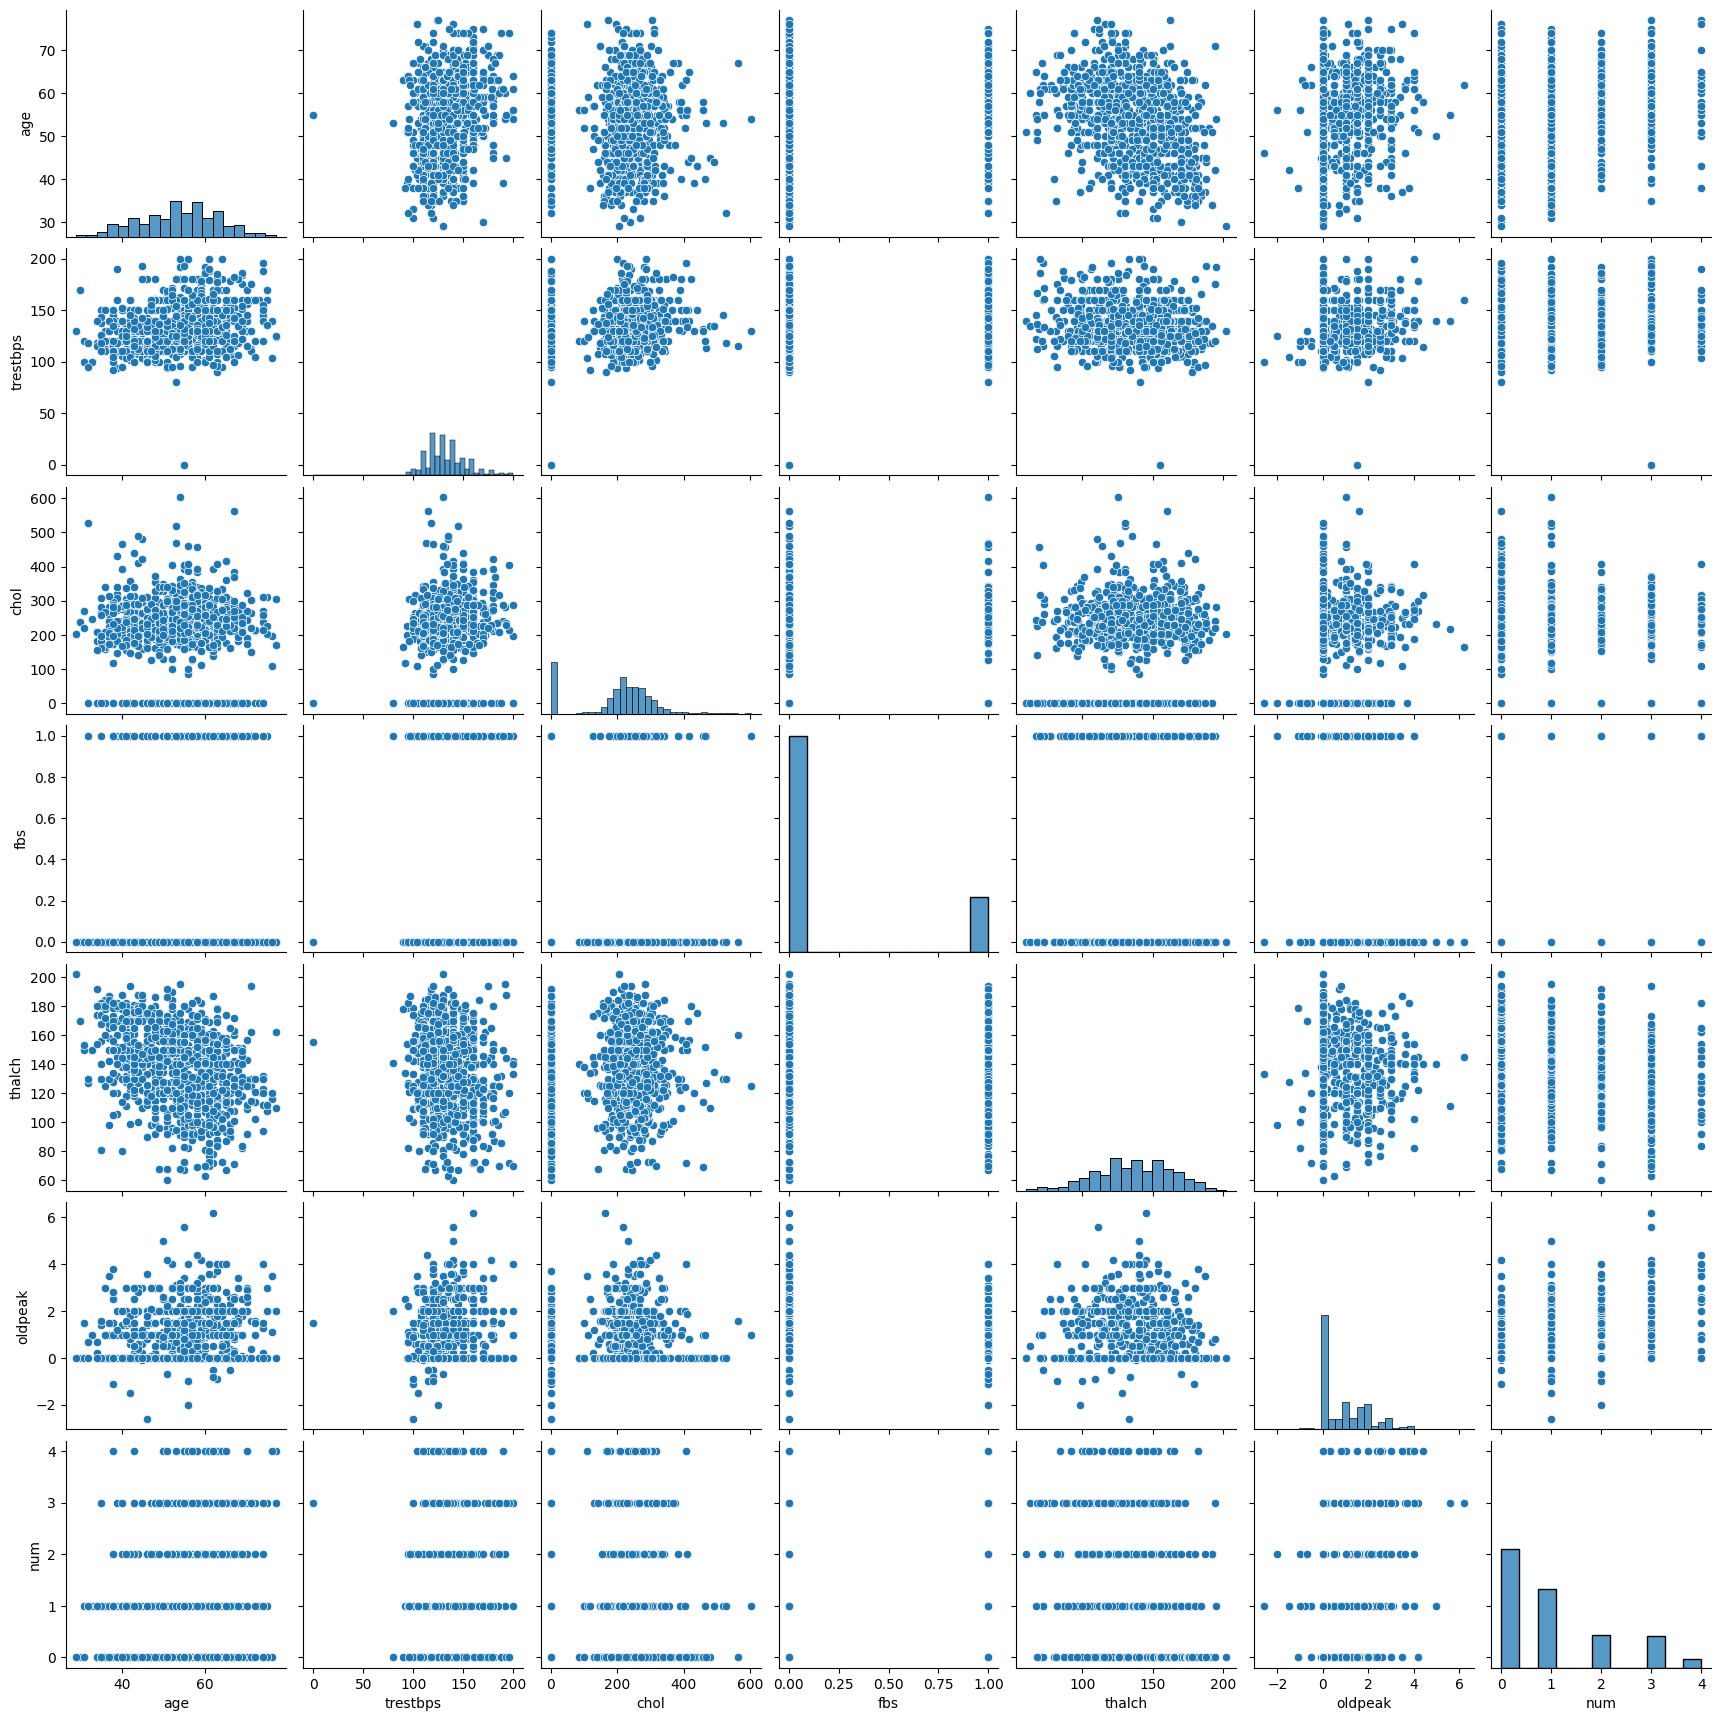

In [12]:
sns.pairplot(df)

### 3.Feature Engineering

In [13]:

numerical_columns = df.select_dtypes(include=[np.number]).columns
df_numerical = df[numerical_columns]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_numerical)

In [14]:
data

array([[0.70833333, 0.725     , 0.38640133, 0.63380282, 0.55681818,
        0.        ],
       [0.25      , 0.675     , 0.33665008, 0.50704225, 0.29545455,
        0.        ],
       [0.58333333, 0.7       , 0.31840796, 0.61971831, 0.34090909,
        0.        ],
       ...,
       [0.5625    , 0.85      , 0.        , 0.44366197, 0.57954545,
        1.        ],
       [0.5625    , 0.72      , 0.34494196, 0.31690141,        nan,
        1.        ],
       [0.58333333, 0.71      , 0.45936982, 0.85915493,        nan,
        1.        ]])

### One Hot Encoding

In [15]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['exang'] = df['exang'].astype('category')

In [16]:
df['sex'] = df['sex'].cat.codes
df['cp'] = df['cp'].cat.codes
df['restecg'] = df['restecg'].cat.codes
df['exng'] = df['exang'].cat.codes
df['slope'] = df['slope'].cat.codes
df['thal'] = df['thal'].cat.codes
df['fbs'] = df['fbs'].cat.codes
df['exang'] = df['exang'].cat.codes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int8   
 2   cp        908 non-null    int8   
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int8   
 6   restecg   908 non-null    int8   
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int8   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int8   
 11  thal      908 non-null    int8   
 12  num       908 non-null    int64  
 13  exng      908 non-null    int8   
dtypes: float64(1), int64(5), int8(8)
memory usage: 49.8 KB


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,exng
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.203744,0.991189,135.957048,0.450441,0.891253,1.155286,1.147577,1.008811,0.450441
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.403003,0.635177,26.804929,0.572013,1.093875,0.691023,0.766027,1.144436,0.572013
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000,1.000000,0.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,2.000000,6.200000,2.000000,2.000000,4.000000,2.000000


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,exng
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0,1


In [20]:
df.drop('exng',axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,1,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,NaN,0,2,4


In [21]:
df.shape

(908, 14)

In [22]:
df1=df.rename({'num':'heart_disease_presence'},axis=1
              )

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,exng
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.210074,0.242662,-0.054644,0.032201,0.326493,0.210074
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.192197,0.102397,-0.045065,0.063795,0.259605,0.192197
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.287621,-0.178388,0.092177,-0.051346,-0.312848,-0.287621
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.182705,0.167131,0.006748,-0.019027,0.137251,0.182705
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.029853,0.029898,0.047292,-0.007112,-0.238813,-0.029853
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.060590,0.024365,-0.026636,-0.008221,0.156268,0.060590
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.126247,-0.033508,-0.084796,-0.162740,0.036508,0.126247
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.359351,-0.139598,0.224048,0.030432,-0.323058,-0.359351
exang,0.210074,0.192197,-0.287621,0.182705,-0.029853,0.060590,0.126247,-0.359351,1.000000,0.385557,-0.149261,0.031807,0.327403,1.000000
oldpeak,0.242662,0.102397,-0.178388,0.167131,0.029898,0.024365,-0.033508,-0.139598,0.385557,1.000000,-0.192223,0.057136,0.437577,0.385557


<Axes: >

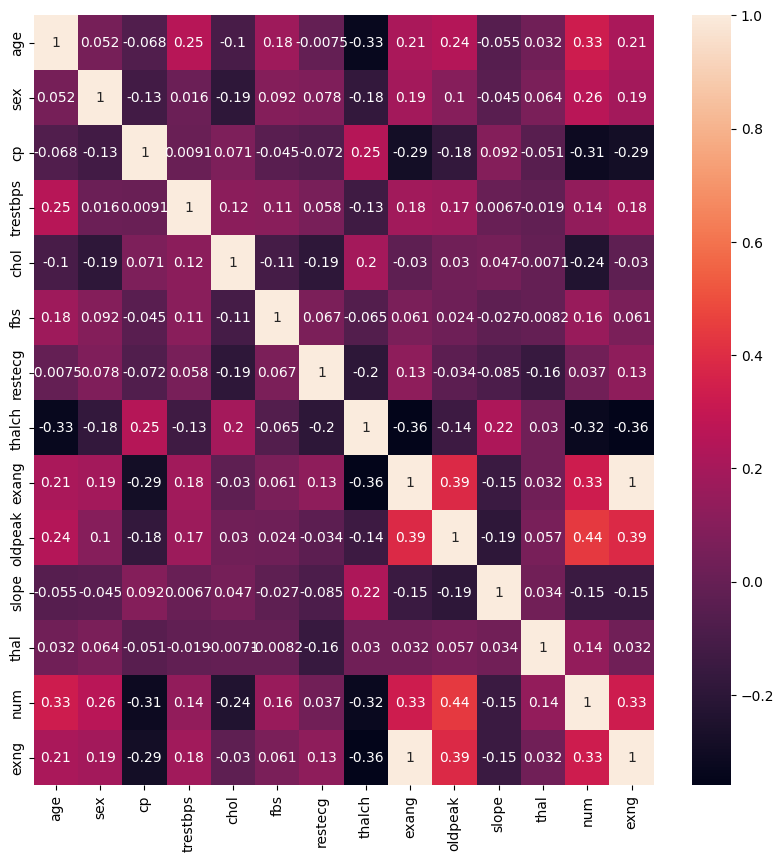

In [24]:
fig =plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


### 4.Decision Tree Splitting

In [34]:
df1['oldpeak'].fillna(0,inplace=True)

In [38]:
#assigning all columns to x except the resulted encoded colmn
x = df1.iloc[:,0:-2]

In [39]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,1
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,0,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,2,0.0,0,2


In [27]:
#assigning the encoded colmn num to y
y=df1['heart_disease_presence']

In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: heart_disease_presence, Length: 908, dtype: int64

In [29]:
#checking how the data is classified after label encoding
# or checking how the values are assigned
df['num'].unique()


array([0, 1, 2, 3, 4])

In [30]:
#checking the count of those labeled vales
df.num.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [31]:
colnames = list(df.columns)
colnames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num',
 'exng']

In [40]:
#splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36)

In [33]:
df1.isna().sum()

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalch                     0
exang                      0
oldpeak                   62
slope                      0
thal                       0
heart_disease_presence     0
exng                       0
dtype: int64

In [37]:
df1.isna().sum()

age                       0
sex                       0
cp                        0
trestbps                  0
chol                      0
fbs                       0
restecg                   0
thalch                    0
exang                     0
oldpeak                   0
slope                     0
thal                      0
heart_disease_presence    0
exng                      0
dtype: int64

In [41]:
#building model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

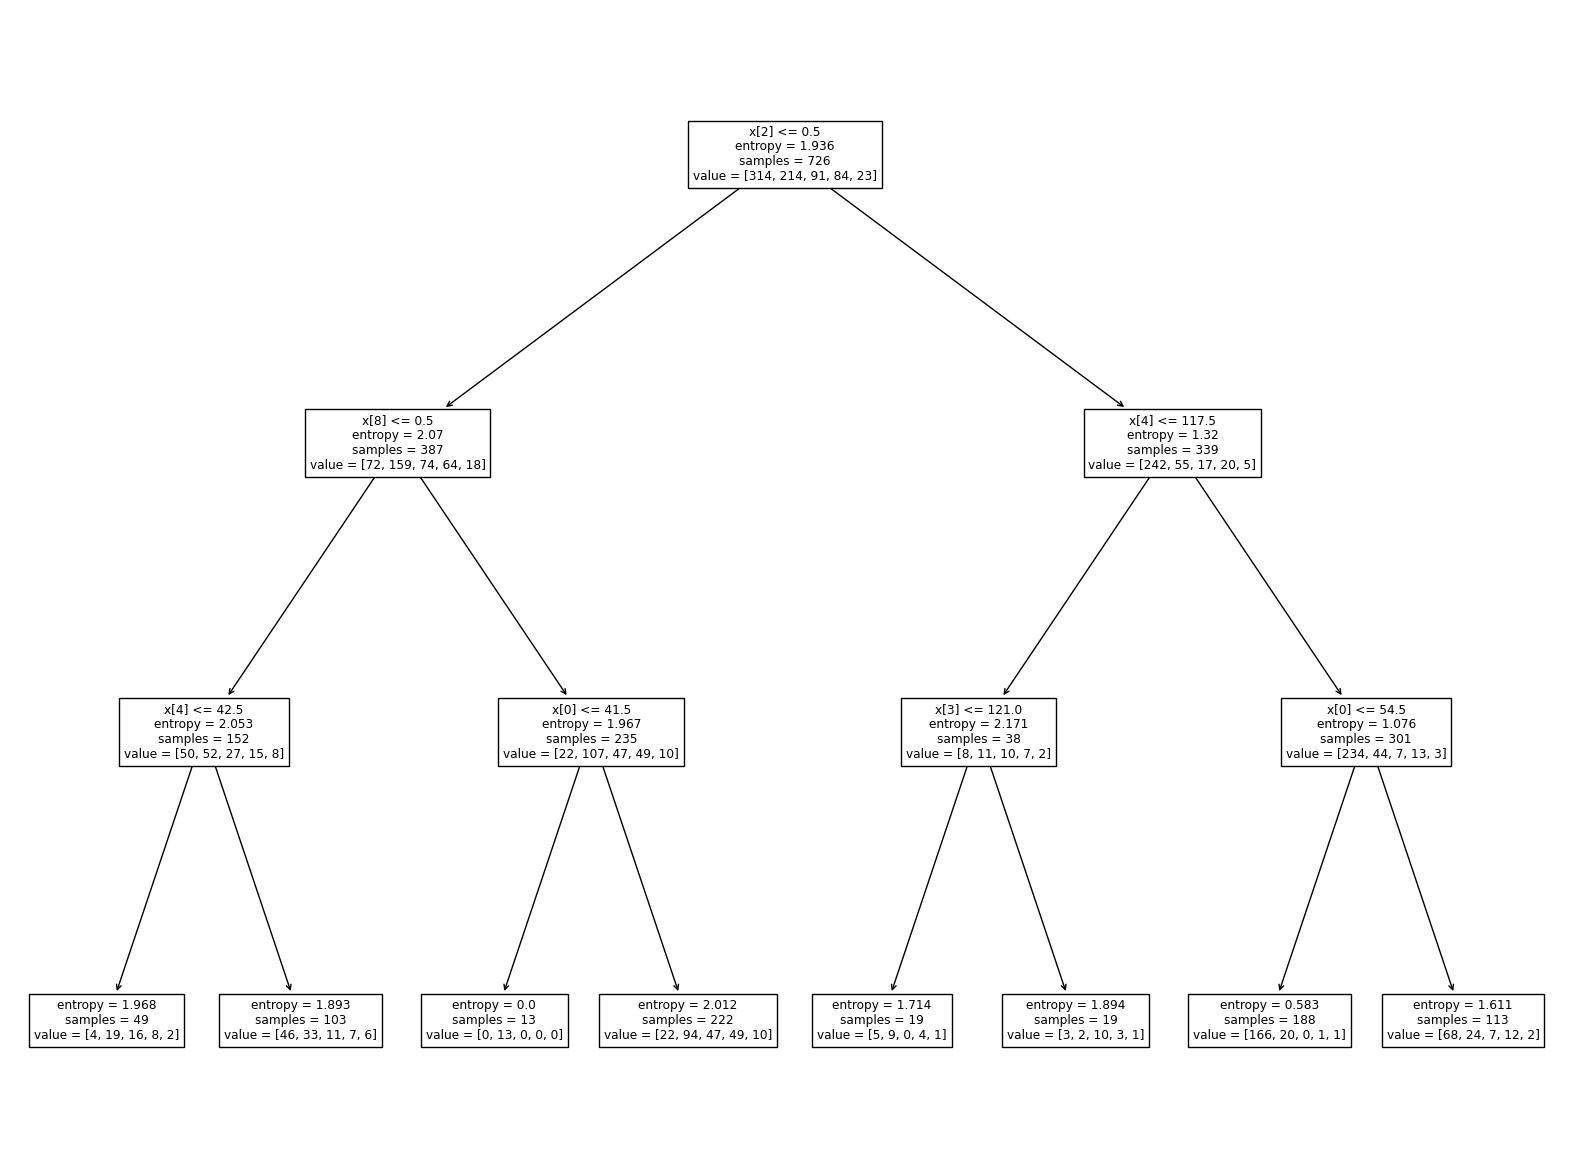

In [42]:
#plotting decision tree
plt.figure(figsize=(20,15))
tree.plot_tree(model);

In [46]:
#predicting test data
import numpy as np
import pandas as pd
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()# getting the count of each category

0    101
1     73
2      8
Name: count, dtype: int64

In [47]:
preds

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 0, 1, 0])

In [48]:
#2x2 table
pd.crosstab(y_test,preds)

col_0,0,1,2
heart_disease_presence,,,
0,68,12,5
1,19,30,2
2,7,11,0
3,6,16,1
4,1,4,0


In [49]:
#accuracy
np.mean(preds==y_test)

0.5384615384615384

### logistic regression accuracy

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100
print(acc)

52.197802197802204


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## hyperparameter tuning

### gini criteria

In [65]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth = 3)

In [66]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

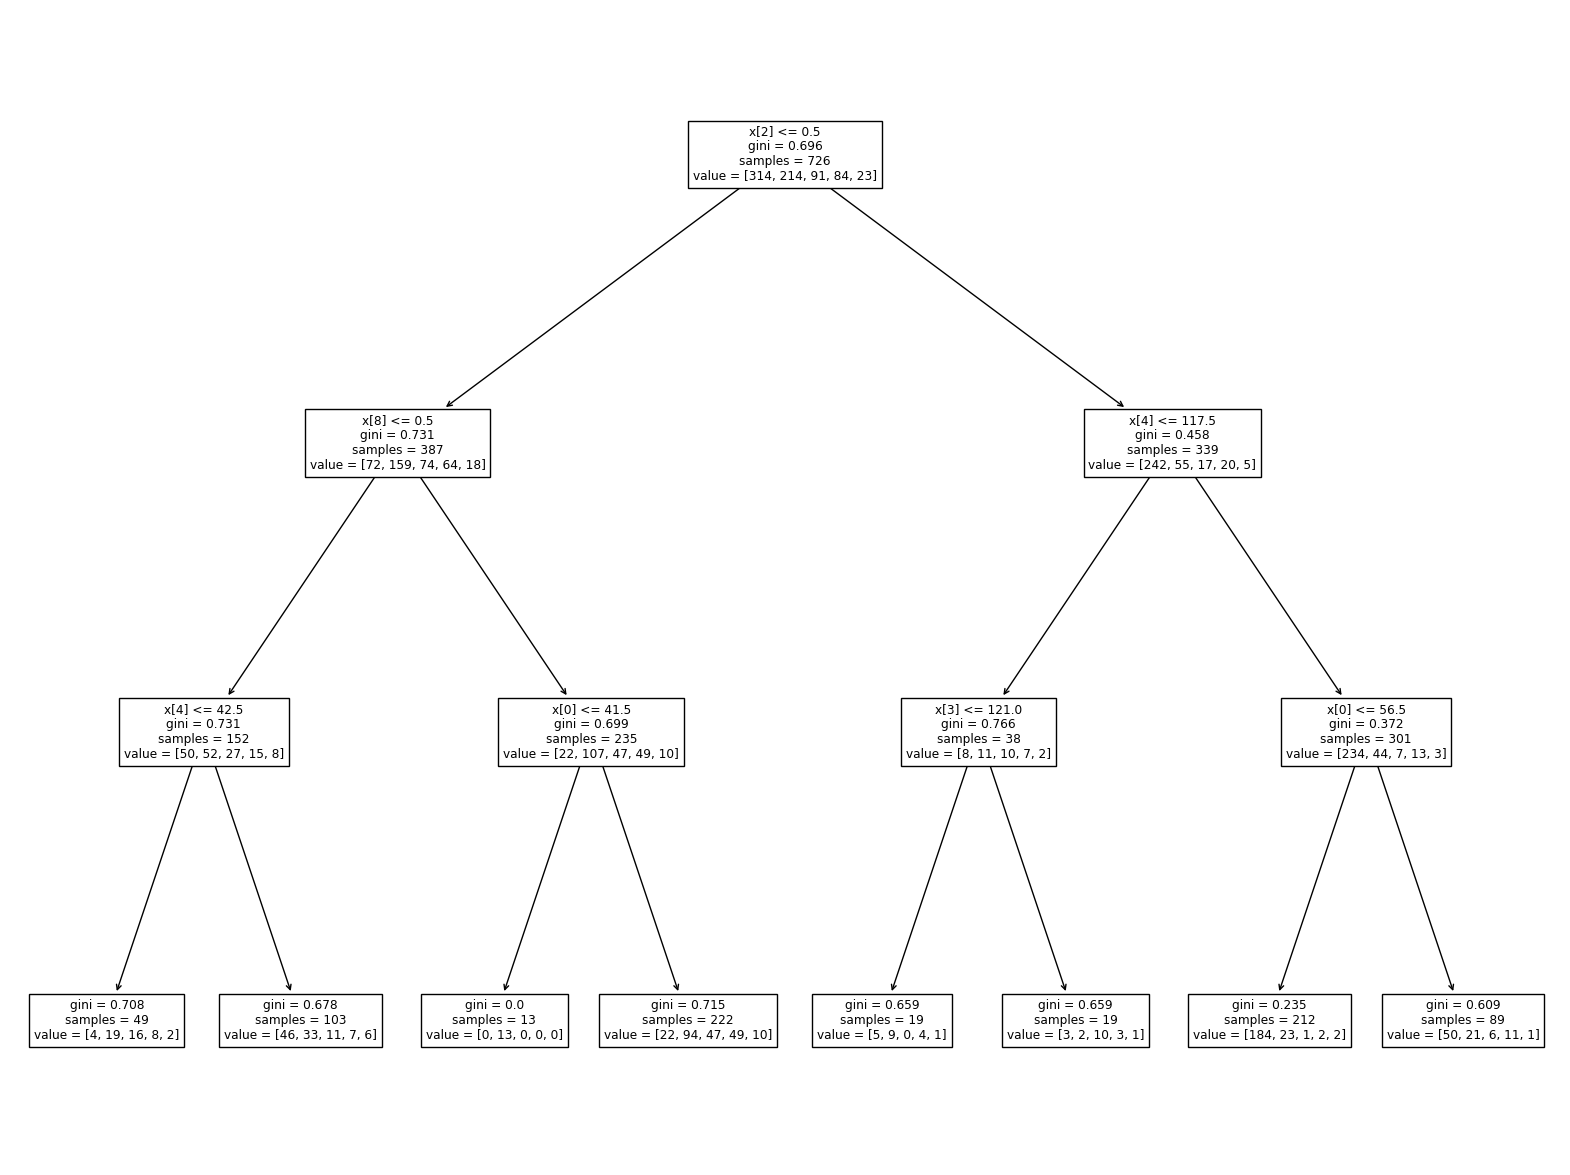

In [76]:
plt.figure(figsize=(20,15))
tree.plot_tree(model_gini);

In [67]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5384615384615384

### Decision tree regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
array = df1.values
X = array[:,0:-2]
y = array[:,-1]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [73]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
#Find the accuracy
model.score(X_test,y_test)

1.0

#### A Decision tree is build to know whether a person is having a heart disease or not. Decision tree is classified according to it it checks and moves towards its right if the statement is correct otherwise it moves towards its left.This process continues untill we obtain a pure region.similarlly we have applied different types of hyperparameter tunings such as entropy,gini impurities,max split.And also we have calculated accuracy and predicted score by building model using decision tree.

# Interview Question :

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Key Hyperparameters of Decision Tree Models

Decision tree models are influenced by several hyperparameters that significantly impact their performance:

* Maximum Depth:
Controls the maximum depth of the tree, balancing model complexity and overfitting. A deeper tree can capture complex patterns but may be prone to overfitting, while a shallower tree risks underfitting.

* Minimum Samples Split:
Sets the minimum number of samples required to split an internal node. A higher value can prevent the tree from overfitting by avoiding splits on noisy data.


* Minimum Samples Leaf:
Sets the minimum number of samples required to be at a leaf node. This can prevent overfitting by ensuring that leaf nodes have a sufficient number of samples.


* Maximum Features:
Limits the number of features considered at each split. This can improve computational efficiency and reduce the risk of overfitting, especially in high-dimensional datasets.


* Criterion:
Determines the quality of a split, influencing the tree's structure. Common criteria include Gini impurity and information gain.


By carefully tuning these hyperparameters, practitioners can optimize the model's performance and generalization ability.

## 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding

- Assigns a unique integer to each category.
- Suitable for ordinal categorical variables where the order between categories matters.
- Preserves the ordinal relationship between categories.
- Can be less computationally expensive than one-hot encoding, especially for large datasets.
- Can be susceptible to the model interpreting the numerical values as having a linear relationship, which might not be the case.


One-Hot Encoding

- Creates a new binary feature for each category.
- Suitable for nominal categorical variables where the order of categories doesn't matter.
- Each category is represented as a separate feature, avoiding the assumption of ordinal relationships.
- Can increase the dimensionality of the dataset, potentially leading to the curse of dimensionality.
- Can be more computationally expensive than label encoding, especially for categorical variables with many categories.